<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Numeric-feature-selection" data-toc-modified-id="Numeric-feature-selection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Numeric feature selection</a></span><ul class="toc-item"><li><span><a href="#RFECV-method" data-toc-modified-id="RFECV-method-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>RFECV method</a></span></li><li><span><a href="#Correlation-Matrix" data-toc-modified-id="Correlation-Matrix-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Correlation Matrix</a></span></li><li><span><a href="#Selected-Numeric-Features" data-toc-modified-id="Selected-Numeric-Features-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Selected Numeric Features</a></span></li></ul></li><li><span><a href="#Non-numeric-feature-selection" data-toc-modified-id="Non-numeric-feature-selection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Non-numeric feature selection</a></span><ul class="toc-item"><li><span><a href="#Correlation-between-categorical-variables-and-SalePrice" data-toc-modified-id="Correlation-between-categorical-variables-and-SalePrice-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Correlation between categorical variables and SalePrice</a></span></li><li><span><a href="#Checking-Boundary-Variable" data-toc-modified-id="Checking-Boundary-Variable-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Checking Boundary Variable</a></span></li><li><span><a href="#Selected-Categorical-Features" data-toc-modified-id="Selected-Categorical-Features-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Selected Categorical Features</a></span></li></ul></li></ul></div>

# Feature Selection

## Numeric feature selection

### RFECV method

To select numeric variables, we'll use sklearn.feature_selection.RFECV.

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train_numeric = train.select_dtypes(include=[np.number]).interpolate().dropna()
x = train_numeric.drop('SalePrice', axis=1)
y = train_numeric.SalePrice

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
selector = RFECV(estimator=LinearRegression(), cv=10, scoring='neg_mean_squared_error')
selector.fit(x,y)
mask=selector.support_


In [4]:
print("Optimal number of features: %d"
     % selector.n_features_)

Optimal number of features: 21


In [5]:
print(selector.ranking_)

[13  1  1 16  1  1  1  1  1  8 15 17  7  3  4  6  1  1  1  1  1  1  1  1
  1  1  1 11  2 12 10  9  1  5 14  1  1]


In [6]:
pd.set_option('display.max_columns',100)
x.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


From the ranking of variable x, we get selected variables as follows:   
MSSubClass, LotFrontage, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, ScreenPorch, MoSold, YrSold 


### Correlation Matrix 

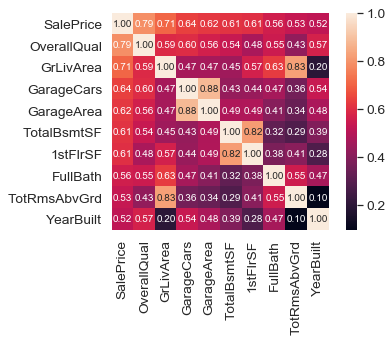

In [8]:
import numpy as np
import seaborn as sns
#saleprice correlation matrix
k = 10 #number of variables for heatmap
numeric_features = train.select_dtypes(include=[np.number])
corrmat = numeric_features.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(numeric_features[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)


**Problems:**   
* 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. 
* 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. 
* 'TotalBsmtSF' and '1stFloor' also seem to be strongly correlated.   

**Solutions:**   
* RFECV method dropped 'GarageArea' and kept 'GarageArea' in the variable selection already.    
* RFECV method dropped both of them but we will keep 'TotalBsmtSF' and return it to the selected variables.   
* We can see all the ten variables except discussed above are in the variable selection. 

### Selected Numeric Features

**Numeric features:**   
TotalBsmtSF, MSSubClass, LotFrontage, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, ScreenPorch, MoSold, YrSold 

## Non-numeric feature selection

### Correlation between categorical variables and SalePrice

We will use the chart we created in Data Exploration phase to check the correlation between categorical variables and SalePrice.

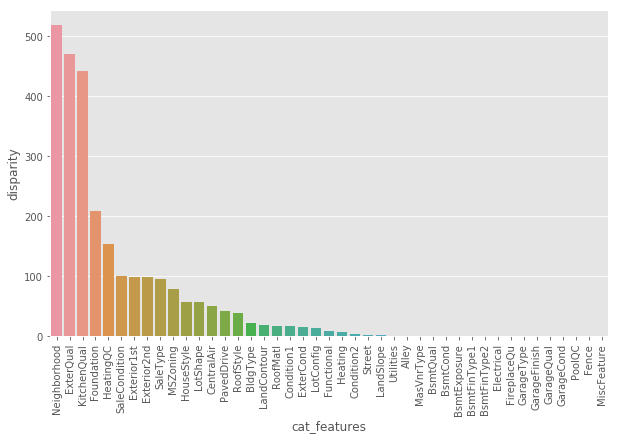

### Checking Boundary Variable

In the chart of categorical variables, we can see utilities have little correlation with SalePrice.
Let's check before and after the utilities.

In [9]:
train_categoricals = train.select_dtypes(exclude=[np.number])
train_categoricals['LandSlope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [10]:
train_categoricals['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [11]:
train_categoricals['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [12]:
train_categoricals['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

We see that mostly all our data sample have AllPub value, this is why this feature is not very usefull for our model, so we drop it

In [13]:
train_categoricals['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [14]:
train_categoricals['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

We see that our data sample is incomplete and is not very useful for our model. Combined with the analysis of utilities, we conclude we can drop all variables below utilities.

### Selected Categorical Features

**Non-numeric features (26 features):**      
Neighborhood, ExterQual, KichenQual, Foundation, HeatingQual, SaleCondition, Exterior1st, Exterior2nd, SaleType, MSZoning, HouseStyle, LotShape, CentralAir, PavedDrive, RoofStyle, BldgType, LandContour, RoofMatl, Condition1, ExterCond, LotConfig, Functional, LotConfig, Functional, Heating, Condition2, Street, Landslope